In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data  = pd.read_csv("data.csv")

[0.24803825 2.2231386 ] [[ 0.00018303 -0.00237945]
 [-0.00237945  0.03166502]]


Text(0,0.5,'Cumulative number of infections')

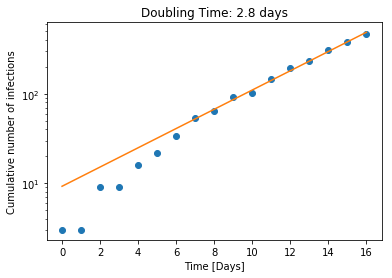

In [3]:
t = data["time"]
logn = np.log(data["count"])
last_n_days = 7
c, V = np.polyfit(t[-last_n_days:], logn[-last_n_days:], 1, full=False, cov=True)
print(c, V)

x = np.linspace(t.min(), t.max())
y = c[0]*x + c[1]
plt.semilogy(data["time"], data["count"], 'o')
plt.plot(x, np.exp(y))
plt.title('Doubling Time: {:.1f} days'.format(np.log(2.0)/c[0]))
plt.xlabel('Time [Days]')
plt.ylabel('Cumulative number of infections')

Text(0,0.5,'Cumulative number of infections')

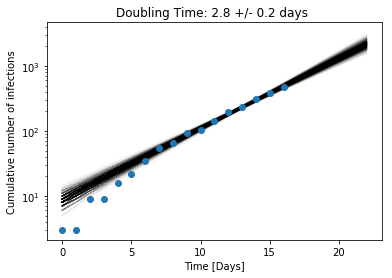

In [4]:
n_mc = 1000
x = np.arange(t.min(), 23)
n_predict = np.ones((n_mc, len(x)))
doubling_time  = np.ones(n_mc)
for i in range(n_mc):
    c_n = np.random.multivariate_normal(c, V, 1)[0]
    y = c_n[0]*x + c_n[1]
    n_predict[i,:] =  np.int_(np.exp(y))
    doubling_time[i] = np.log(2.0)/c_n[0]
    plt.plot(x, np.int_(np.exp(y)), color='black', alpha=0.01)
    
    
plt.semilogy(data["time"], data["count"], 'o')

plt.title('Doubling Time: {:.1f} +/- {:.1f} days '.format(
    np.mean(doubling_time), np.std(doubling_time)))
plt.xlabel('Time [Days]')
plt.ylabel('Cumulative number of infections')

In [5]:
# predictions
for i in range(16, 23):
    print("{} de Marzo \t {} +/- {} casos".format(
        9+i, np.int(np.mean(n_predict[:,i])), np.int(np.std(n_predict[:,i]))))

25 de Marzo 	 488 +/- 24 casos
26 de Marzo 	 627 +/- 38 casos
27 de Marzo 	 804 +/- 59 casos
28 de Marzo 	 1032 +/- 89 casos
29 de Marzo 	 1324 +/- 131 casos
30 de Marzo 	 1699 +/- 191 casos
31 de Marzo 	 2181 +/- 275 casos
